<a href="https://colab.research.google.com/github/Anil2003/ARIMA-EMD/blob/main/1_univ_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
import random as rn
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import os
from keras import optimizers
from keras.layers import GRU

from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(2017)  
rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

#session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
#                              inter_op_parallelism_threads=1, allow_soft_placement=True, device_count = {'CPU': 1})

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

#tf.set_random_seed(1234)

#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import numpy as np
import tensorflow as tf
import random as rn
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
from keras import optimizers

In [ ]:
#x1 = pd.read_csv('rewa.csv', skiprows=(10))
#x2 = pd.read_excel('region1.xlsx', skiprows=(10))
x3 = pd.read_csv('16883-2011.csv', skiprows=(3))
#print(x1.head(10))
#print(x2.head(10))
print(x3.head(10))

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dta = x3
dta

,Year,Month,Day,Hour,Minute,GHI,GHI.1,GHI.2,GHI.3,GHI.4,GHI.5,GHI.6,GHI.7,GHI.8,GHI.9,GHI.10,GHI.11,GHI.12,GHI.13,GHI.14,GHI.15,GHI.16,GHI.17,GHI.18
0,2005,1,1,7,0,41,23,89,61,24,69,52,79,65,53,63,51,29,48,79,70,87,55,59
1,2005,1,1,8,0,85,125,286,135,98,284,178,181,167,126,185,80,123,168,245,205,298,191,266
2,2005,1,1,9,0,146,280,402,236,260,403,285,374,277,370,320,386,286,409,352,204,416,354,341
3,2005,1,1,10,0,145,204,567,350,380,597,443,419,536,561,424,493,230,322,403,570,539,377,493
4,2005,1,1,11,0,134,184,405,281,326,510,474,576,192,326,454,627,483,195,587,566,571,644,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43156,2014,12,31,12,0,198,234,615,179,621,674,627,675,327,630,652,617,462,364,668,449,685,683,655
43157,2014,12,31,13,0,164,300,327,445,487,575,562,612,244,568,587,553,445,261,539,177,626,621,432
43158,2014,12,31,14,0,199,115,387,441,415,285,437,424,230,446,462,431,369,321,469,99,497,355,394
43159,2014,12,31,15,0,71,136,224,323,137,128,270,226,290,280,291,265,225,309,202,72,186,195,302


In [ ]:
#dta = dta.iloc[::-1]

In [ ]:
dta = dta['GHI.18'].values

In [ ]:
dta

array([ 59, 266, 341, ..., 394, 302, 109])

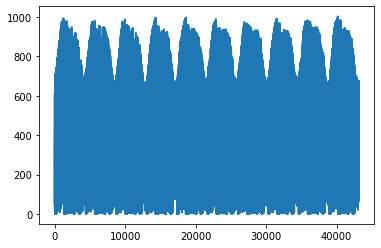

In [ ]:
plt.plot(dta)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

43161

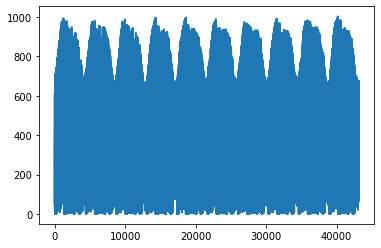

In [ ]:
series = dta.tolist()
plt.plot(series)
len(series)

In [ ]:
#series = np.log10(series)
#plt.plot(series)

In [ ]:
#series = series.tolist()

In [ ]:
43161*80/100, 43161-34529

(34528.8, 8632)

In [ ]:
#split into test and train
#percentage = 0.6
train, test = series[0:34529], series[34529:43161]
len(train), len(test)

(34529, 8632)

# TRAIN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers.recurrent import SimpleRNN, LSTM
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

In [ ]:
residual = train

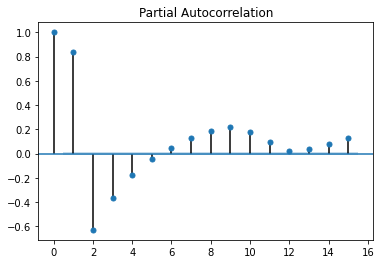

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(residual, lags=15)
pyplot.show()

In [ ]:
dataset = pd.DataFrame(residual)

window_size = 5

datasett = dataset.copy()
for i in range(window_size):
    dataset = pd.concat([dataset, datasett.shift(-(i+1))], axis = 1)   
dataset.dropna(axis=0, inplace=True)

residual = dataset
residual.head()

,0,0,0,0,0,0
0,59,266.0,341.0,493.0,325.0,610.0
1,266,341.0,493.0,325.0,610.0,169.0
2,341,493.0,325.0,610.0,169.0,216.0
3,493,325.0,610.0,169.0,216.0,107.0
4,325,610.0,169.0,216.0,107.0,26.0


In [ ]:
residual.shape

(34524, 6)

In [ ]:
residual = np.array(residual)
nn_y = residual[:,[5]]
nn_y.shape 

(34524, 1)

In [ ]:
nn_x = residual[:,0:5]
nn_x.shape

(34524, 5)

In [ ]:
nn_x.shape, nn_y.shape

((34524, 5), (34524, 1))

In [ ]:
"""
Hybrid Model
"""

modelnn = Sequential()
modelnn.add(LSTM(units = 50, input_shape=(1,1), return_sequences=True))
modelnn.add(LSTM(50))
#modelnn.add(Dense(10, input_dim=1))
modelnn.add(Dense(25))
modelnn.add(Dense(1))
modelnn.add(Activation("linear"))
modelnn.compile(loss='mean_squared_error', optimizer='adam')
modelnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
train_nn_x_scaled = min_max_scaler.fit_transform(nn_x) 
train_nn_x_scaled.shape

(34524, 5)

In [ ]:
train_nn_y_scaled = min_max_scaler.fit_transform(nn_y) 
train_nn_y_scaled.shape

(34524, 1)

In [ ]:
train_nn_x_scaled = np.reshape(train_nn_x_scaled, (train_nn_x_scaled.shape[0], train_nn_x_scaled.shape[1], 1))
modelnn.fit(train_nn_x_scaled,train_nn_y_scaled, epochs=50, batch_size=32, validation_split = .05)

Epoch 1/50
1025/1025 [==============================] - 7s 7ms/step - loss: 0.0241 - val_loss: 0.0108
Epoch 2/50
1025/1025 [==============================] - 7s 7ms/step - loss: 0.0113 - val_loss: 0.0100
Epoch 3/50
1025/1025 [==============================] - 7s 7ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 4/50
1025/1025 [==============================] - 7s 7ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 5/50
1025/1025 [==============================] - 7s 6ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 6/50
1025/1025 [==============================] - 7s 7ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 7/50
1025/1025 [==============================] - 7s 7ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 8/50
1025/1025 [==============================] - 7s 6ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 9/50
1025/1025 [==============================] - 7s 7ms/step - loss: 0.0089 - val_loss: 0.0082
Epoch 10/50
1025/1025 [==============================] - 7s 7ms/step - loss: 0.008

# TEST

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

In [ ]:
residual = test

In [ ]:
dataset = pd.DataFrame(residual)

window_size = 5

datasett = dataset.copy()
for i in range(window_size):
    dataset = pd.concat([dataset, datasett.shift(-(i+1))], axis = 1)   
dataset.dropna(axis=0, inplace=True)

residual = dataset
residual.head()

,0,0,0,0,0,0
0,114,76.0,262.0,439.0,574.0,651.0
1,76,262.0,439.0,574.0,651.0,659.0
2,262,439.0,574.0,651.0,659.0,599.0
3,439,574.0,651.0,659.0,599.0,478.0
4,574,651.0,659.0,599.0,478.0,309.0


In [ ]:
residual.shape

(8627, 6)

In [ ]:
residual = np.array(residual)
nn_y = residual[:,[5]]
nn_y.shape 

(8627, 1)

In [ ]:
nn_x_test = residual[:,0:5]
nn_x_test.shape

(8627, 5)

In [ ]:
nn_x_test.shape, nn_y.shape

((8627, 5), (8627, 1))

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
train_nn_x_test_scaled = min_max_scaler.fit_transform(nn_x_test) 
train_nn_x_test_scaled.shape

(8627, 5)

In [ ]:
train_nn_y_test_scaled = min_max_scaler.fit_transform(nn_y) 
train_nn_y_test_scaled.shape

(8627, 1)

In [ ]:
train_nn_x_test_scaled = np.reshape(train_nn_x_test_scaled, (train_nn_x_test_scaled.shape[0], train_nn_x_test_scaled.shape[1], 1))
final = modelnn.predict(train_nn_x_test_scaled)

In [ ]:
#final = min_max_scaler.inverse_transform(final)

In [ ]:
final.shape#, predictions.shape

(8627, 1)

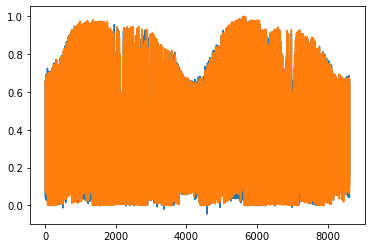

In [ ]:
plt.plot(final)
plt.plot(train_nn_y_test_scaled)

In [ ]:
true = train_nn_y_test_scaled

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE1=mean_squared_error(true, final)
print("MSE:",MSE1)

RMSE = sqrt(MSE1)
print("RMSE:",RMSE)

MSE: 0.007798203604205849
RMSE: 0.08830743798914024


In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(true, final)
print("MAE:",MAE)

MAE: 0.052329648646909296


In [ ]:
from sklearn.metrics import r2_score
print('R2 score:',r2_score(true, final))

R2 score: 0.906297569418153


In [ ]:
error = sqrt(mean_squared_error(true, final))/np.mean(true)
print(' nrmse var:',error)

 nrmse var: 0.1985114618406543
